In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import TensorFlow and load MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the data (train and test sets)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2025-11-13 03:56:09.889545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 03:56:27.496791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 03:56:36.221912: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

np.uint8(5)

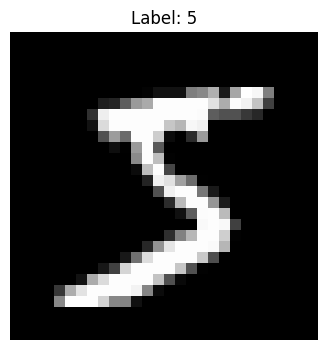

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

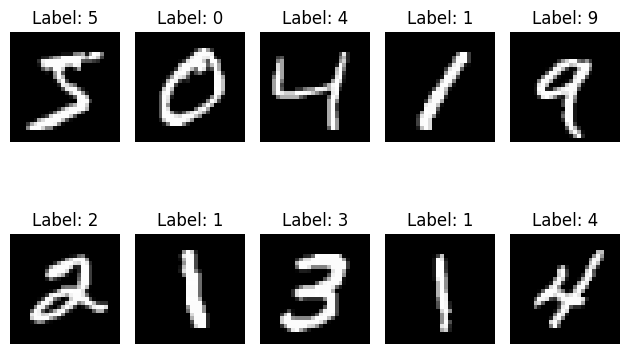

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()

In [9]:
X_train=tf.constant(X_train, dtype=tf.float32)/255.0
X_test=tf.constant(X_test, dtype=tf.float32)/255.0
y_train=tf.constant(y_train, dtype=tf.int32)
y_test=tf.constant(y_test, dtype=tf.int32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

2025-11-13 03:56:43.162565: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-11-13 03:56:43.301396: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-11-13 03:56:43.500698: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-11-13 03:56:43.559273: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.
2025-11-13 03:56:43.572153: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


(TensorShape([60000, 28, 28]),
 TensorShape([10000, 28, 28]),
 TensorShape([60000]),
 TensorShape([10000]))

# Model 1 - Underfit

In [10]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model1.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7335 - loss: 0.8902 - val_accuracy: 0.8781 - val_loss: 0.4395
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8863 - loss: 0.4030 - val_accuracy: 0.9026 - val_loss: 0.3485
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9020 - loss: 0.3484 - val_accuracy: 0.9099 - val_loss: 0.3205
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9085 - loss: 0.3249 - val_accuracy: 0.9135 - val_loss: 0.3067
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9119 - loss: 0.3112 - val_accuracy: 0.9136 - val_loss: 0.2983


In [12]:
model1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9136 - loss: 0.2983


[0.298292875289917, 0.9136000275611877]

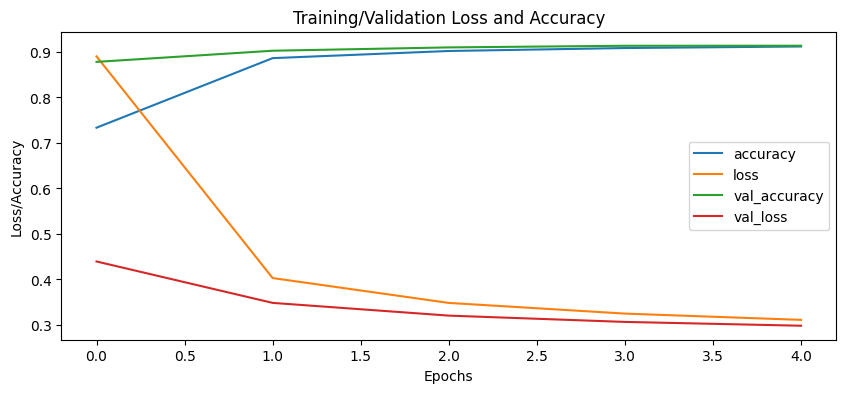

In [13]:
pd.DataFrame(model1.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

# Model 2 - Right fit

In [14]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8351 - loss: 0.5707 - val_accuracy: 0.9230 - val_loss: 0.2646
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9329 - loss: 0.2374 - val_accuracy: 0.9396 - val_loss: 0.2054
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9468 - loss: 0.1867 - val_accuracy: 0.9491 - val_loss: 0.1754
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9545 - loss: 0.1575 - val_accuracy: 0.9550 - val_loss: 0.1567
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9597 - loss: 0.1379 - val_accuracy: 0.9574 - val_loss: 0.1455


In [16]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.9574 - loss: 0.1455


[0.14551514387130737, 0.9574000239372253]

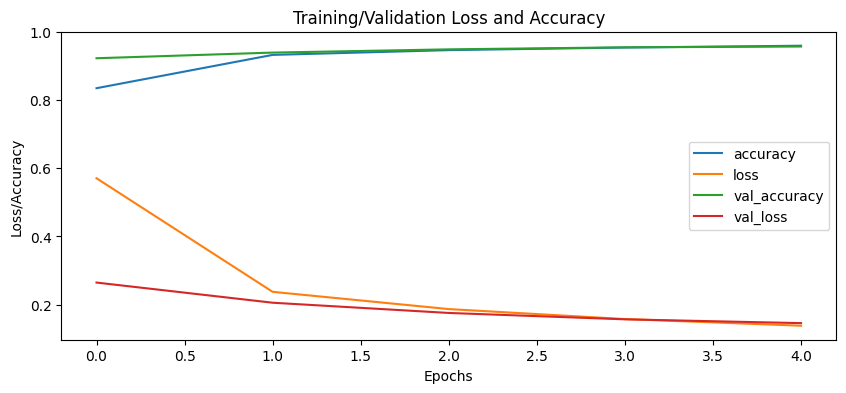

In [17]:
pd.DataFrame(model2.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

# Model 3 - Overfit

In [18]:
tf.random.set_seed(42)

model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model3.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,618 (1.83 MB)

 Trainable params: 478,618 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8962 - loss: 0.3380 - val_accuracy: 0.9598 - val_loss: 0.1295
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9691 - loss: 0.1039 - val_accuracy: 0.9658 - val_loss: 0.1062
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.0657 - val_accuracy: 0.9696 - val_loss: 0.1026
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9848 - loss: 0.0489 - val_accuracy: 0.9747 - val_loss: 0.0897
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9749 - val_loss: 0.0903


In [20]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0903


[0.09033315628767014, 0.9749000072479248]

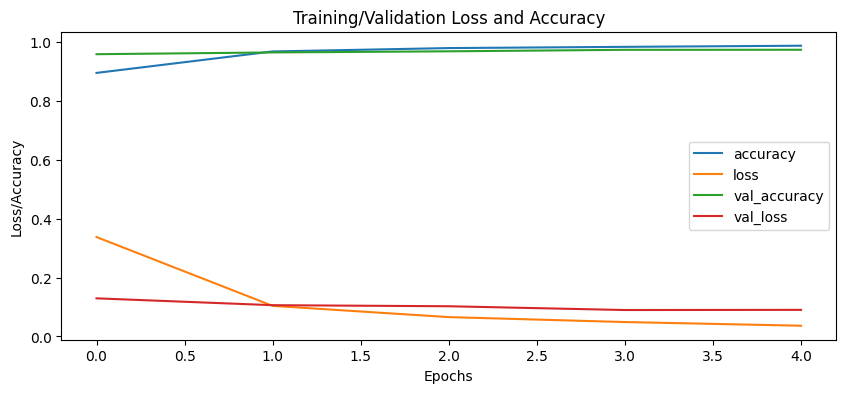

In [21]:
pd.DataFrame(model3.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

# Hyperparameter tuning in model2

Training with Batch Size: 16
Epoch 1/5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9046 - loss: 0.3271 - val_accuracy: 0.9393 - val_loss: 0.1993
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9046 - loss: 0.3271 - val_accuracy: 0.9393 - val_loss: 0.1993
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9503 - loss: 0.1685 - val_accuracy: 0.9524 - val_loss: 0.1580
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9503 - loss: 0.1685 - val_accuracy: 0.9524 - val_loss: 0.1580
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9609 - loss: 0.1320 - val_accuracy: 0.9570 - val_loss: 0.1456
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9609 - loss: 0.1320 - val_accuracy: 0.9570 - val_loss: 0.1456
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9672 - loss: 0.1099 - val_accuracy: 0.9591 - val_loss: 0.1395
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9672 - loss: 0.1099 - val_accuracy: 0.95

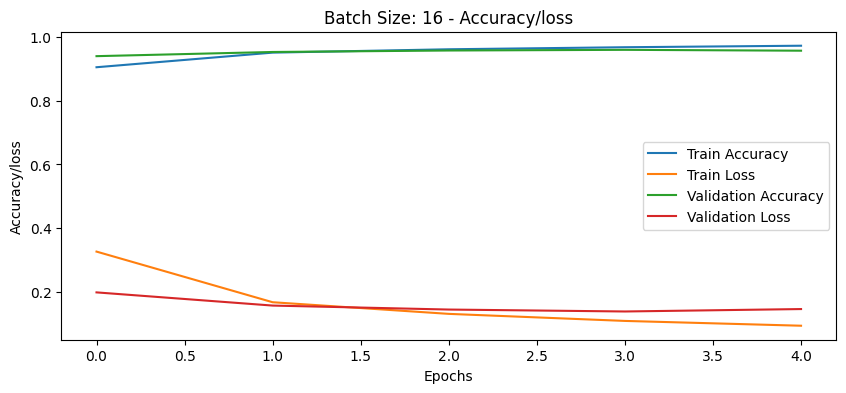

Training with Batch Size: 32
Epoch 1/5
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8906 - loss: 0.3821 - val_accuracy: 0.9376 - val_loss: 0.2121
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8906 - loss: 0.3821 - val_accuracy: 0.9376 - val_loss: 0.2121
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9471 - loss: 0.1822 - val_accuracy: 0.9520 - val_loss: 0.1565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9471 - loss: 0.1822 - val_accuracy: 0.9520 - val_loss: 0.1565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9591 - loss: 0.1399 - val_accuracy: 0.9566 - val_loss: 0.1421
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9591 - loss: 0.1399 - val_accuracy: 0.9566 - val_loss: 0.1421
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9656 - loss: 0.1157 - val_accuracy: 0.9590 - val_loss: 0.1328
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc

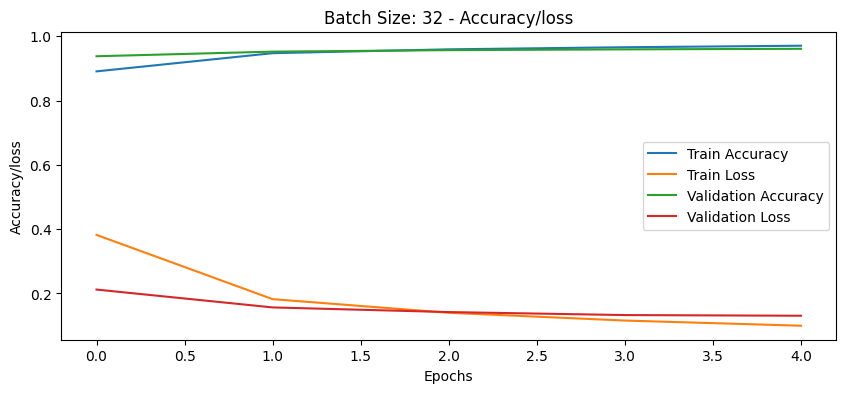

Training with Batch Size: 64
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8655 - loss: 0.4544 - val_accuracy: 0.9270 - val_loss: 0.2406
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8655 - loss: 0.4544 - val_accuracy: 0.9270 - val_loss: 0.2406
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9404 - loss: 0.2039 - val_accuracy: 0.9435 - val_loss: 0.1902
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9404 - loss: 0.2039 - val_accuracy: 0.9435 - val_loss: 0.1902
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9518 - loss: 0.1654 - val_accuracy: 0.9499 - val_loss: 0.1685
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9518 - loss: 0.1654 - val_accuracy: 0.9499 - val_loss: 0.1685
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9586 - loss: 0.1418 - val_accuracy: 0.9550 - val_loss: 0.1532
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9586 - loss: 0.14

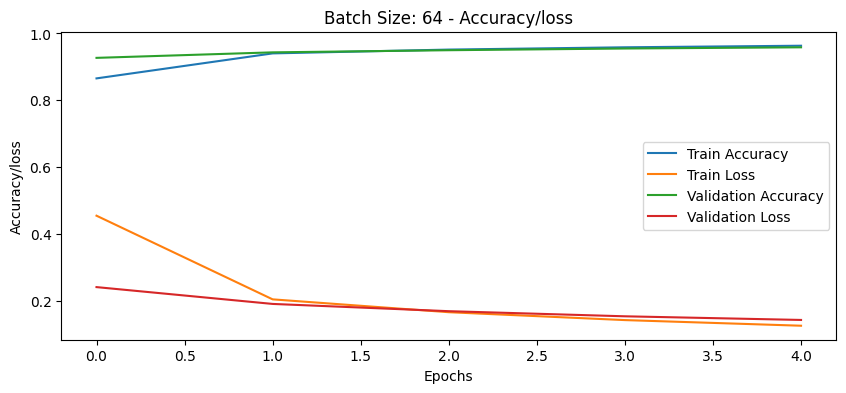

Training with Batch Size: 128
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.5707 - val_accuracy: 0.9222 - val_loss: 0.2634
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.5707 - val_accuracy: 0.9222 - val_loss: 0.2634
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9324 - loss: 0.2336 - val_accuracy: 0.9424 - val_loss: 0.1944
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9324 - loss: 0.2336 - val_accuracy: 0.9424 - val_loss: 0.1944
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9473 - loss: 0.1827 - val_accuracy: 0.9517 - val_loss: 0.1670
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9473 - loss: 0.1827 - val_accuracy: 0.9517 - val_loss: 0.1670
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1566 - val_accuracy: 0.9566 - val_loss: 0.1526
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1

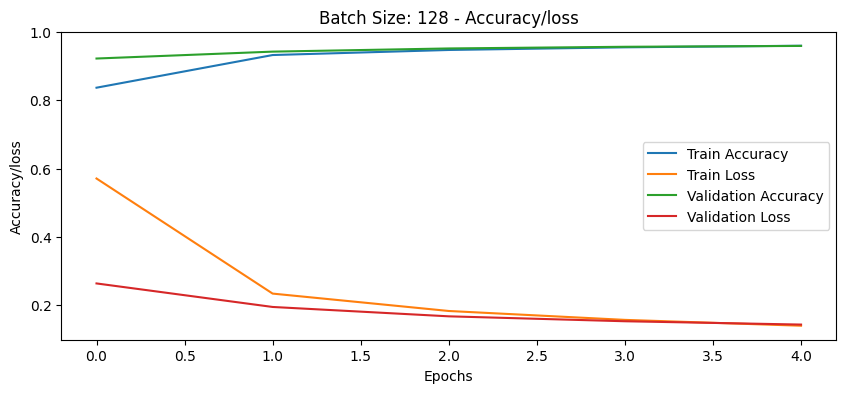

Training with Batch Size: 256
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.7244 - val_accuracy: 0.9182 - val_loss: 0.3068
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.7244 - val_accuracy: 0.9182 - val_loss: 0.3068
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2684 - val_accuracy: 0.9378 - val_loss: 0.2261
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2684 - val_accuracy: 0.9378 - val_loss: 0.2261
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.2117 - val_accuracy: 0.9435 - val_loss: 0.1944
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.2117 - val_accuracy: 0.9435 - val_loss: 0.1944
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9475 - loss: 0.1819 - val_accuracy: 0.9487 - val_loss: 0.1764
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9475 - loss: 0.1

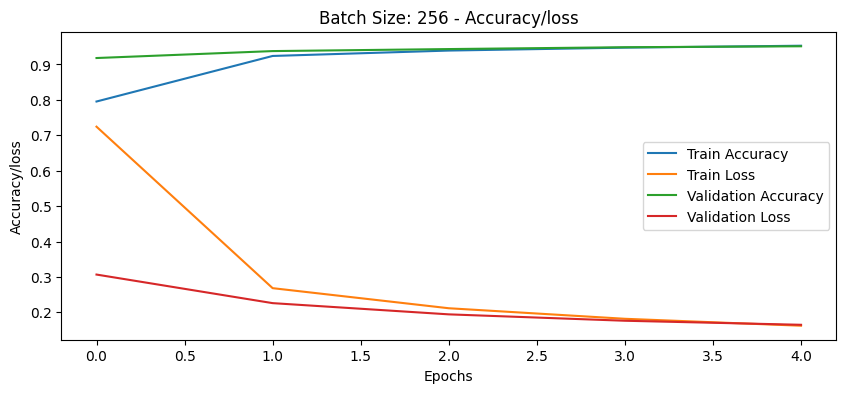

Training with Batch Size: 512
Epoch 1/5
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7146 - loss: 0.9783 - val_accuracy: 0.8958 - val_loss: 0.3795
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7146 - loss: 0.9783 - val_accuracy: 0.8958 - val_loss: 0.3795
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9072 - loss: 0.3318 - val_accuracy: 0.9202 - val_loss: 0.2801
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9072 - loss: 0.3318 - val_accuracy: 0.9202 - val_loss: 0.2801
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9243 - loss: 0.2666 - val_accuracy: 0.9312 - val_loss: 0.2417
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9243 - loss: 0.2666 - val_accuracy: 0.9312 - val_loss: 0.2417
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.2339 - val_accuracy: 0.9377 - val_loss: 0.2176
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 -

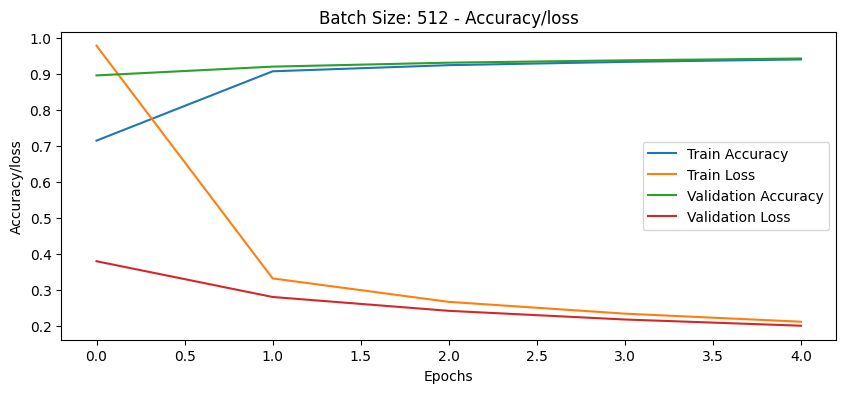

In [36]:
batch_sizes = [16, 32, 64, 128, 256, 512]
batch_size_results = {}

for batch_size in batch_sizes:
    print(f"Training with Batch Size: {batch_size}")
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size,
                       validation_data=(X_test, y_test))
    
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Batch Size: {batch_size} - Accuracy/loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/loss')
    plt.legend()
    plt.show()

## 2. Weight Initialization Tuning

Training with Initializer: glorot_uniform
Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8457 - loss: 0.5333 - val_accuracy: 0.9214 - val_loss: 0.2664
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8457 - loss: 0.5333 - val_accuracy: 0.9214 - val_loss: 0.2664
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.2473 - val_accuracy: 0.9369 - val_loss: 0.2133
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.2473 - val_accuracy: 0.9369 - val_loss: 0.2133
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9410 - loss: 0.2038 - val_accuracy: 0.9441 - val_loss: 0.1854
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9410 - loss: 0.2038 - val_accuracy: 0.9441 - val_loss: 0.1854
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1760 - val_accuracy: 0.9490 - val_loss: 0.1666
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1760 - val_accuracy: 0.9490 - val_loss: 0

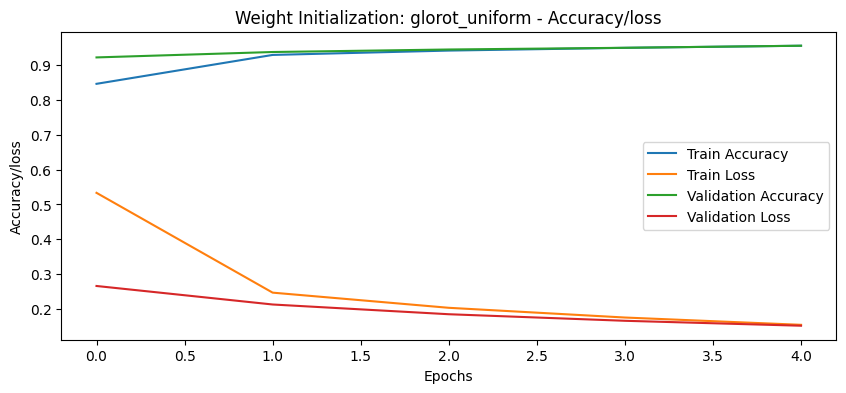

Training with Initializer: he_normal
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8415 - loss: 0.5510 - val_accuracy: 0.9279 - val_loss: 0.2532
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8415 - loss: 0.5510 - val_accuracy: 0.9279 - val_loss: 0.2532
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2365 - val_accuracy: 0.9416 - val_loss: 0.2000
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2365 - val_accuracy: 0.9416 - val_loss: 0.2000
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1919 - val_accuracy: 0.9504 - val_loss: 0.1719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1919 - val_accuracy: 0.9504 - val_loss: 0.1719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1641 - val_accuracy: 0.9535 - val_loss: 0.1565
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - lo

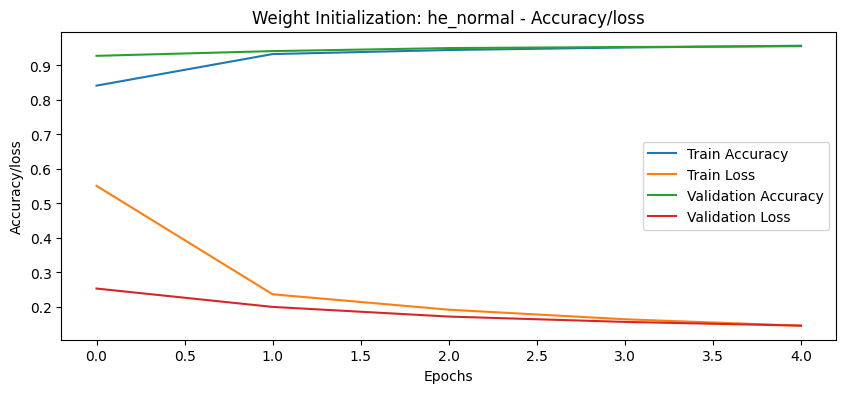

Training with Initializer: random_normal
Epoch 1/5
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7911 - loss: 0.7042 - val_accuracy: 0.9091 - val_loss: 0.3057
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7911 - loss: 0.7042 - val_accuracy: 0.9091 - val_loss: 0.3057
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2715 - val_accuracy: 0.9327 - val_loss: 0.2317
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2715 - val_accuracy: 0.9327 - val_loss: 0.2317
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.2165 - val_accuracy: 0.9418 - val_loss: 0.1961
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.2165 - val_accuracy: 0.9418 - val_loss: 0.1961
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.1851 - val_accuracy: 0.9493 - val_loss: 0.1743
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

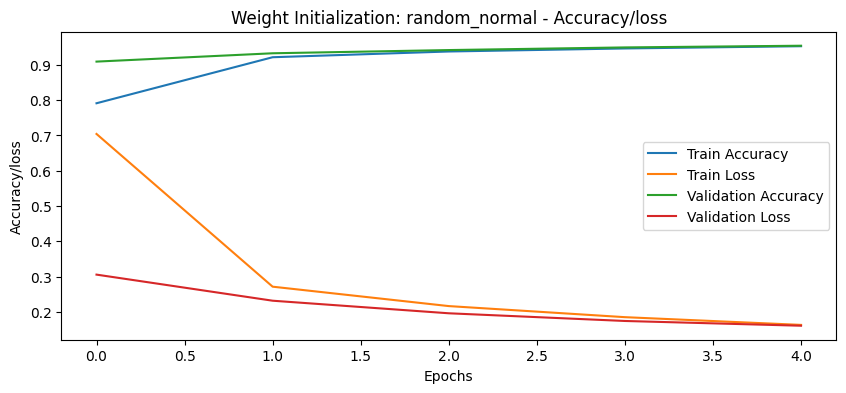

Training with Initializer: zeros
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1124 - loss: 

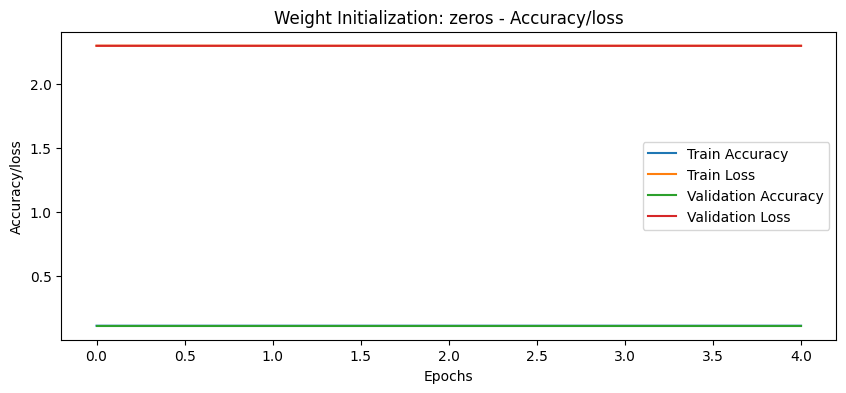

Done!


In [37]:
initializers = ['glorot_uniform', 'he_normal', 'random_normal', 'zeros']
init_results = {}

for init in initializers:
    print(f"Training with Initializer: {init}")
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer=init),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                       validation_data=(X_test, y_test))
    
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Weight Initialization: {init} - Accuracy/loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/loss')
    plt.legend()
    plt.show()
    
    tf.keras.backend.clear_session()

print("Done!")

## 3. Dropout Rate Tuning

Training with Dropout: 0.0
Epoch 1/5
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7091 - loss: 0.9666

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 0.5354 - val_accuracy: 0.9242 - val_loss: 0.2557
Epoch 2/5
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9343 - loss: 0.2290 - val_accuracy: 0.9444 - val_loss: 0.1908
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9343 - loss: 0.2290 - val_accuracy: 0.9444 - val_loss: 0.1908
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1779 - val_accuracy: 0.9525 - val_loss: 0.1585
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1779 - val_accuracy: 0.9525 - val_loss: 0.1585
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9575 - loss: 0.1490 - val_accuracy: 0.9569 - val_loss: 0.1415
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9575 - loss: 0.1490 - val_accuracy: 0.9569 - val_loss: 0.1415
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1299 - val_accuracy: 0.9605 - v

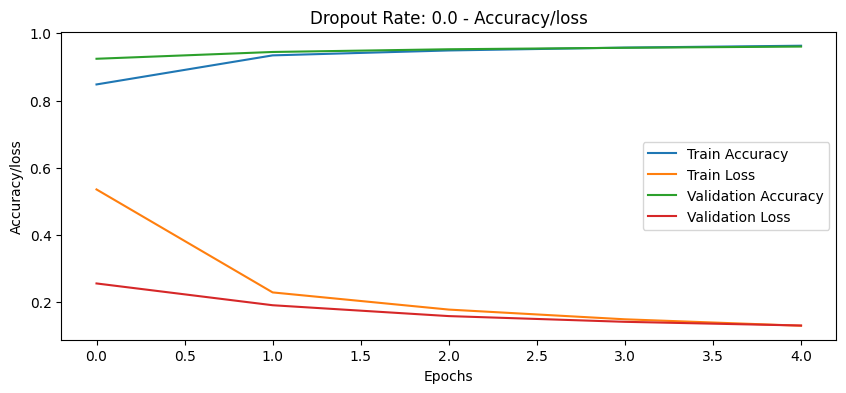

Training with Dropout: 0.1
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7713 - loss: 0.7213 - val_accuracy: 0.9217 - val_loss: 0.2675
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7713 - loss: 0.7213 - val_accuracy: 0.9217 - val_loss: 0.2675
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.3589 - val_accuracy: 0.9408 - val_loss: 0.2086
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.3589 - val_accuracy: 0.9408 - val_loss: 0.2086
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.2969 - val_accuracy: 0.9464 - val_loss: 0.1795
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.2969 - val_accuracy: 0.9464 - val_loss: 0.1795
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2619 - val_accuracy: 0.9517 - val_loss: 0.1564
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2619

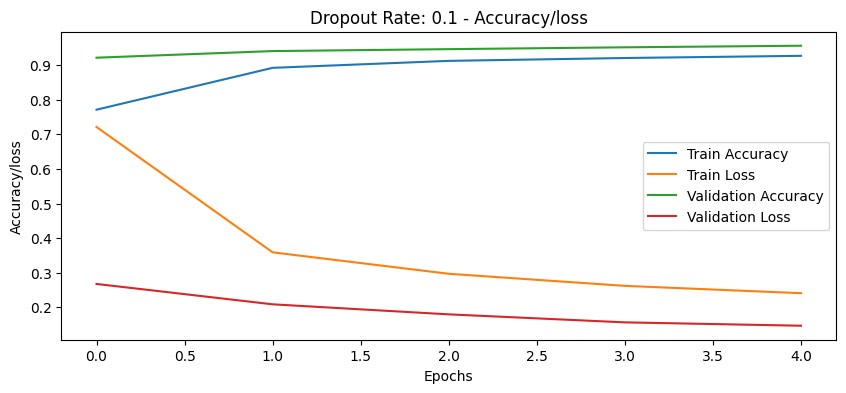

Training with Dropout: 0.2
Epoch 1/5
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6689 - loss: 0.9976 - val_accuracy: 0.9040 - val_loss: 0.3518
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6689 - loss: 0.9976 - val_accuracy: 0.9040 - val_loss: 0.3518
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.5111 - val_accuracy: 0.9263 - val_loss: 0.2550
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.5111 - val_accuracy: 0.9263 - val_loss: 0.2550
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.4256 - val_accuracy: 0.9370 - val_loss: 0.2252
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.4256 - val_accuracy: 0.9370 - val_loss: 0.2252
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8889 - loss: 0.3766 - val_accuracy: 0.9440 - val_loss: 0.1992
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8889 - lo

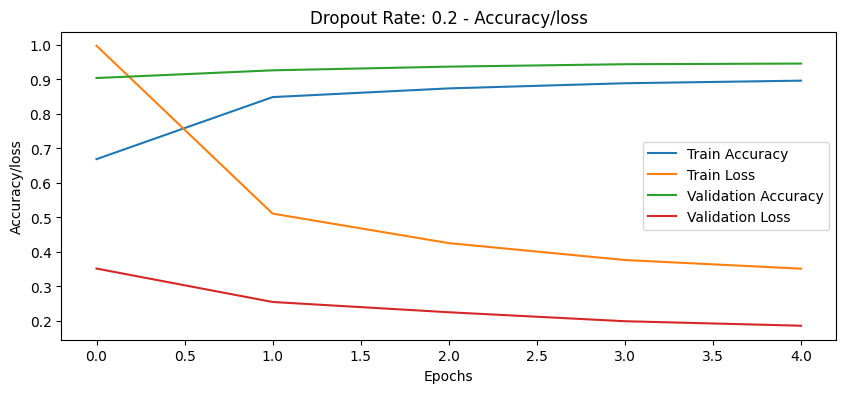

Training with Dropout: 0.3
Epoch 1/5
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6322 - loss: 1.0873 - val_accuracy: 0.9076 - val_loss: 0.3524
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6322 - loss: 1.0873 - val_accuracy: 0.9076 - val_loss: 0.3524
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.6306 - val_accuracy: 0.9237 - val_loss: 0.2695
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.6306 - val_accuracy: 0.9237 - val_loss: 0.2695
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.5444 - val_accuracy: 0.9340 - val_loss: 0.2378
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.5444 - val_accuracy: 0.9340 - val_loss: 0.2378
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.4901 - val_accuracy: 0.9368 - val_loss: 0.2228
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - lo

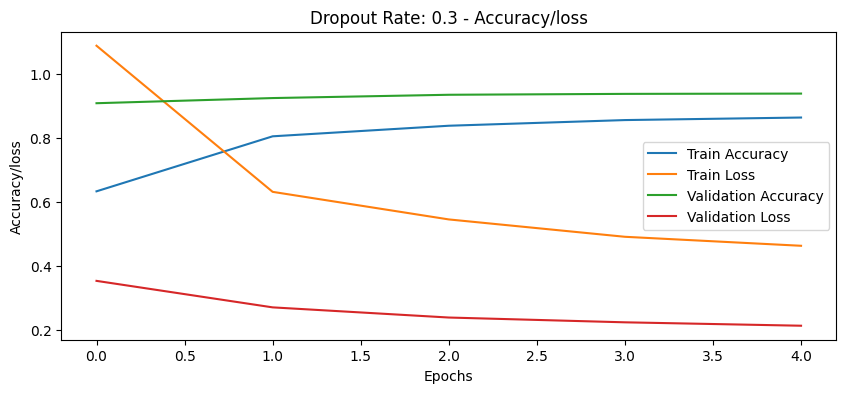

Training with Dropout: 0.4
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5484 - loss: 1.2793 - val_accuracy: 0.8943 - val_loss: 0.4390
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5484 - loss: 1.2793 - val_accuracy: 0.8943 - val_loss: 0.4390
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7261 - loss: 0.8183 - val_accuracy: 0.9137 - val_loss: 0.3398
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7261 - loss: 0.8183 - val_accuracy: 0.9137 - val_loss: 0.3398
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.7130 - val_accuracy: 0.9204 - val_loss: 0.3004
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.7130 - val_accuracy: 0.9204 - val_loss: 0.3004
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7864 - loss: 0.6622 - val_accuracy: 0.9224 - val_loss: 0.2844
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7864 - loss: 0.6622

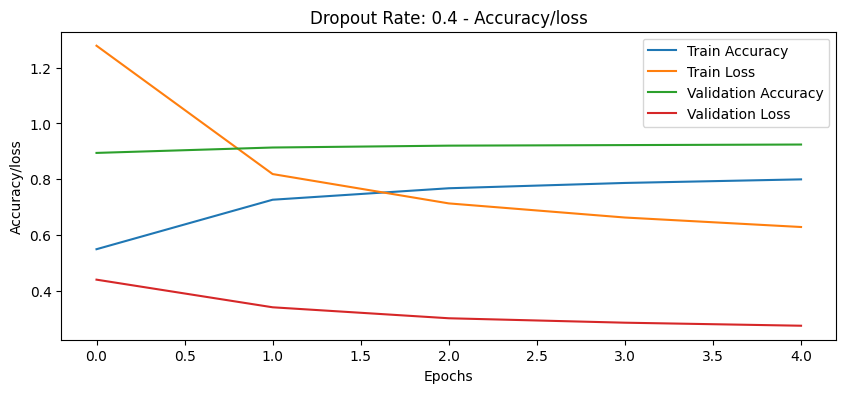

Training with Dropout: 0.5
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4326 - loss: 1.5856 - val_accuracy: 0.8898 - val_loss: 0.6151
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4326 - loss: 1.5856 - val_accuracy: 0.8898 - val_loss: 0.6151
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6102 - loss: 1.1094 - val_accuracy: 0.9059 - val_loss: 0.4315
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6102 - loss: 1.1094 - val_accuracy: 0.9059 - val_loss: 0.4315
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6583 - loss: 0.9909 - val_accuracy: 0.9138 - val_loss: 0.3688
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6583 - loss: 0.9909 - val_accuracy: 0.9138 - val_loss: 0.3688
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6781 - loss: 0.9382 - val_accuracy: 0.9188 - val_loss: 0.3372
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6781 - loss: 0.9382

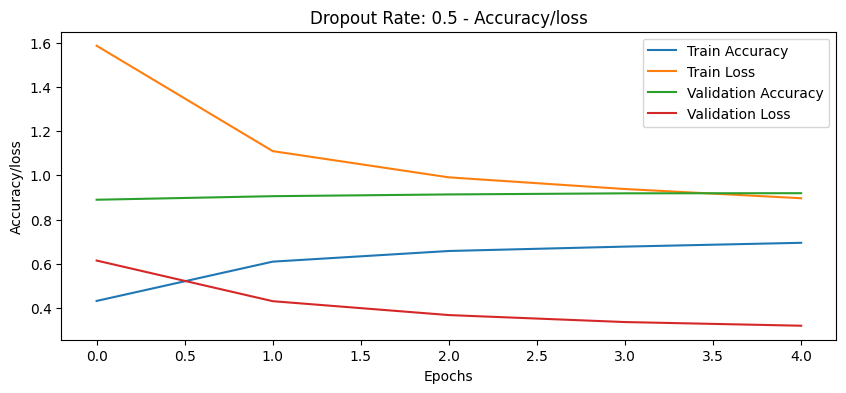

Done!


In [43]:
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
dropout_results = {}

for dropout in dropout_rates:
    print(f"Training with Dropout: {dropout}")
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                       validation_data=(X_test, y_test))
    
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Dropout Rate: {dropout} - Accuracy/loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/loss')
    plt.legend()
    plt.show()
    
    tf.keras.backend.clear_session()

print("Done!")

## 4. Optimizer Tuning

Training with Optimizer: Adam
Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8504 - loss: 0.5278 - val_accuracy: 0.9257 - val_loss: 0.2557
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8504 - loss: 0.5278 - val_accuracy: 0.9257 - val_loss: 0.2557
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2333 - val_accuracy: 0.9398 - val_loss: 0.1992
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2333 - val_accuracy: 0.9398 - val_loss: 0.1992
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1919 - val_accuracy: 0.9469 - val_loss: 0.1771
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1919 - val_accuracy: 0.9469 - val_loss: 0.1771
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1678 - val_accuracy: 0.9506 - val_loss: 0.1636
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1678 - val_accuracy: 0.9506 - val_loss: 0

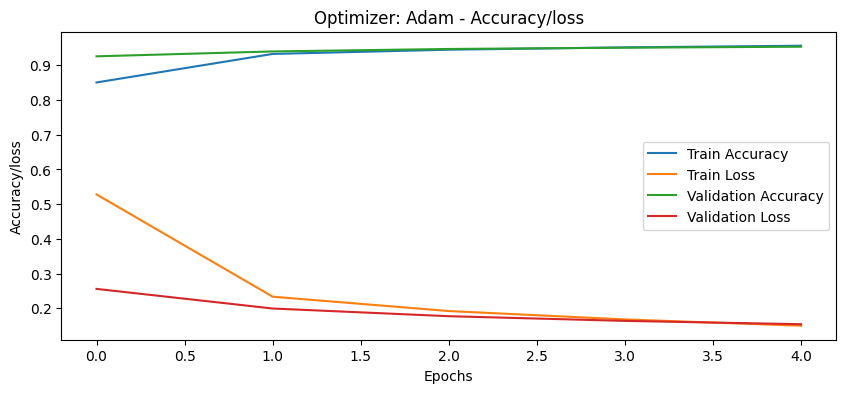

Training with Optimizer: SGD
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5523 - loss: 1.4845 - val_accuracy: 0.7853 - val_loss: 0.8249
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5523 - loss: 1.4845 - val_accuracy: 0.7853 - val_loss: 0.8249
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.6637 - val_accuracy: 0.8523 - val_loss: 0.5237
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.6637 - val_accuracy: 0.8523 - val_loss: 0.5237
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.4960 - val_accuracy: 0.8793 - val_loss: 0.4281
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.4960 - val_accuracy: 0.8793 - val_loss: 0.4281
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.4212 - val_accuracy: 0.8943 - val_loss: 0.3742
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.42

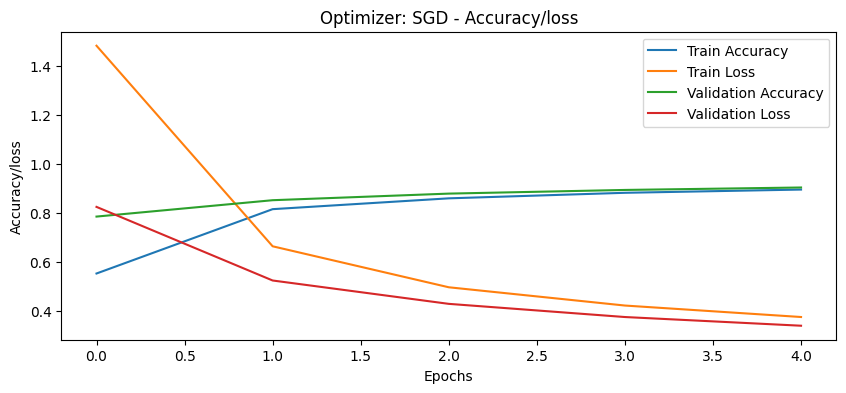

Training with Optimizer: RMSprop
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.5181 - val_accuracy: 0.9208 - val_loss: 0.2771
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.5181 - val_accuracy: 0.9208 - val_loss: 0.2771
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9318 - loss: 0.2359 - val_accuracy: 0.9380 - val_loss: 0.2115
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9318 - loss: 0.2359 - val_accuracy: 0.9380 - val_loss: 0.2115
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1879 - val_accuracy: 0.9480 - val_loss: 0.1797
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1879 - val_accuracy: 0.9480 - val_loss: 0.1797
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9528 - loss: 0.1600 - val_accuracy: 0.9544 - val_loss: 0.1581
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9528 - loss: 

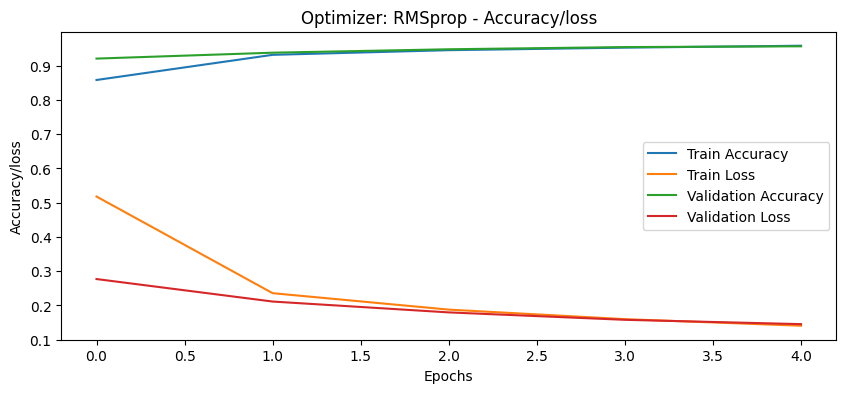

Training with Optimizer: Adagrad
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2948 - loss: 2.0559 - val_accuracy: 0.4675 - val_loss: 1.7624
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2948 - loss: 2.0559 - val_accuracy: 0.4675 - val_loss: 1.7624
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5671 - loss: 1.5663 - val_accuracy: 0.6620 - val_loss: 1.3599
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5671 - loss: 1.5663 - val_accuracy: 0.6620 - val_loss: 1.3599
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6964 - loss: 1.2468 - val_accuracy: 0.7362 - val_loss: 1.1059
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6964 - loss: 1.2468 - val_accuracy: 0.7362 - val_loss: 1.1059
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 1.0443 - val_accuracy: 0.7796 - val_loss: 0.9420
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 

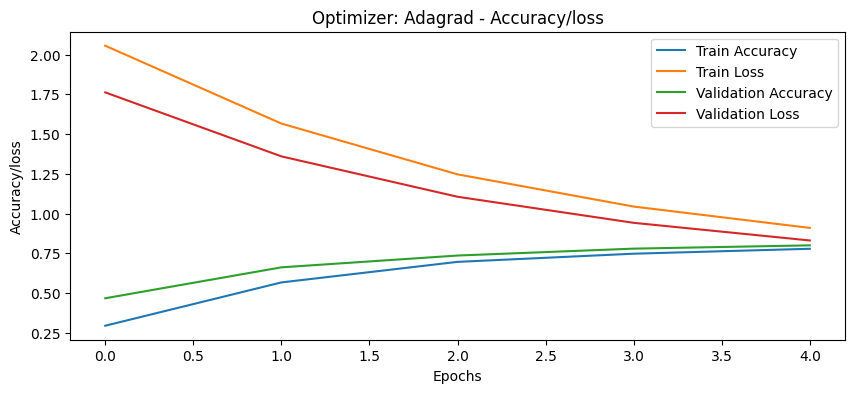

Done!


In [44]:
optimizers_list = {
    'Adam': tf.keras.optimizers.Adam(),
    'SGD': tf.keras.optimizers.SGD(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad()
}
optimizer_results = {}

for opt_name, optimizer in optimizers_list.items():
    print(f"Training with Optimizer: {opt_name}")
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                       validation_data=(X_test, y_test))
    
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Optimizer: {opt_name} - Accuracy/loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/loss')
    plt.legend()
    plt.show()
    
    tf.keras.backend.clear_session()

print("Done!")

## 5. Learning Rate Tuning (Static Learning Rates)

Training with Learning Rate: 0.0001
Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5476 - loss: 1.5418 - val_accuracy: 0.7739 - val_loss: 0.9243
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5476 - loss: 1.5418 - val_accuracy: 0.7739 - val_loss: 0.9243
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.7055 - val_accuracy: 0.8667 - val_loss: 0.5244
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.7055 - val_accuracy: 0.8667 - val_loss: 0.5244
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.4684 - val_accuracy: 0.8927 - val_loss: 0.4003
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.4684 - val_accuracy: 0.8927 - val_loss: 0.4003
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.3818 - val_accuracy: 0.9064 - val_loss: 0.3454
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.3818 - val_accuracy: 0.9064 - val_loss: 0

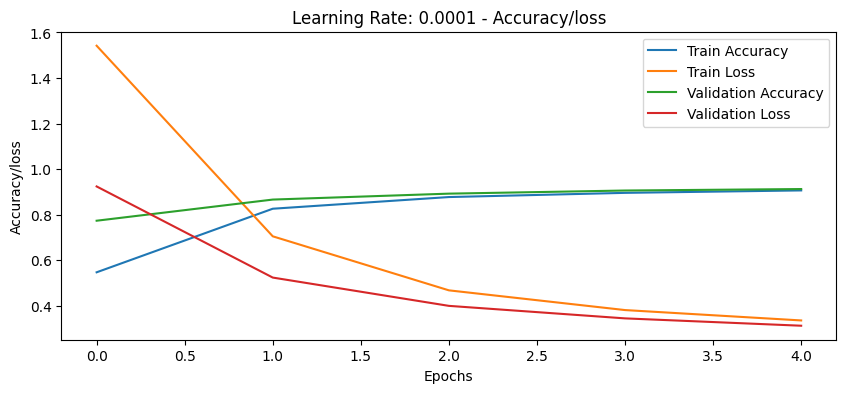

Training with Learning Rate: 0.0005
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.7533 - val_accuracy: 0.9070 - val_loss: 0.3250
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.7533 - val_accuracy: 0.9070 - val_loss: 0.3250
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2879 - val_accuracy: 0.9291 - val_loss: 0.2419
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2879 - val_accuracy: 0.9291 - val_loss: 0.2419
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.2281 - val_accuracy: 0.9392 - val_loss: 0.2047
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.2281 - val_accuracy: 0.9392 - val_loss: 0.2047
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1959 - val_accuracy: 0.9459 - val_loss: 0.1836
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - los

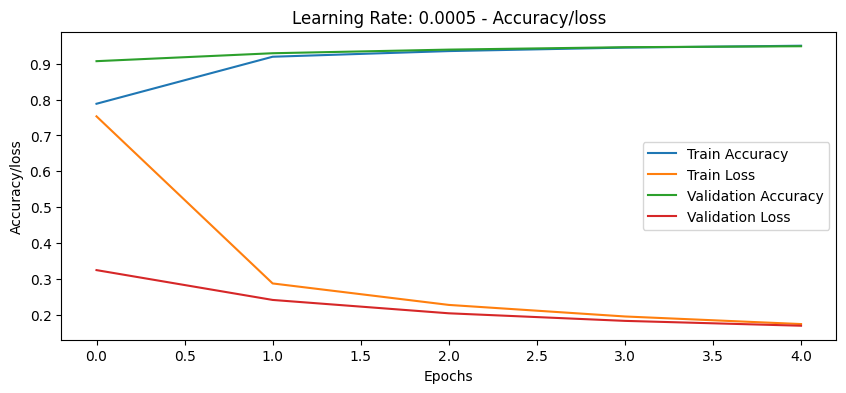

Training with Learning Rate: 0.001
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.5203 - val_accuracy: 0.9283 - val_loss: 0.2533
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.5203 - val_accuracy: 0.9283 - val_loss: 0.2533
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9363 - loss: 0.2203 - val_accuracy: 0.9429 - val_loss: 0.1941
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9363 - loss: 0.2203 - val_accuracy: 0.9429 - val_loss: 0.1941
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1765 - val_accuracy: 0.9507 - val_loss: 0.1649
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1765 - val_accuracy: 0.9507 - val_loss: 0.1649
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1508 - val_accuracy: 0.9547 - val_loss: 0.1493
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss

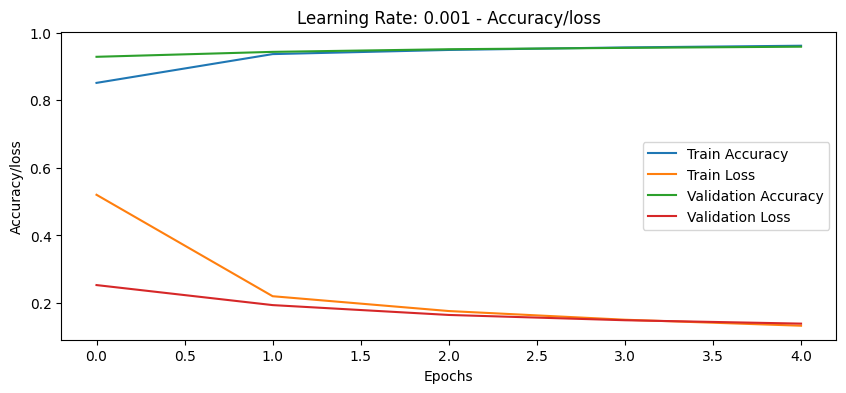

Training with Learning Rate: 0.005
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.3504 - val_accuracy: 0.9226 - val_loss: 0.2589
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.3504 - val_accuracy: 0.9226 - val_loss: 0.2589
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9485 - loss: 0.1756 - val_accuracy: 0.9411 - val_loss: 0.1983
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9485 - loss: 0.1756 - val_accuracy: 0.9411 - val_loss: 0.1983
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1420 - val_accuracy: 0.9343 - val_loss: 0.2284
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1420 - val_accuracy: 0.9343 - val_loss: 0.2284
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9634 - loss: 0.1234 - val_accuracy: 0.9465 - val_loss: 0.1932
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9634 - loss

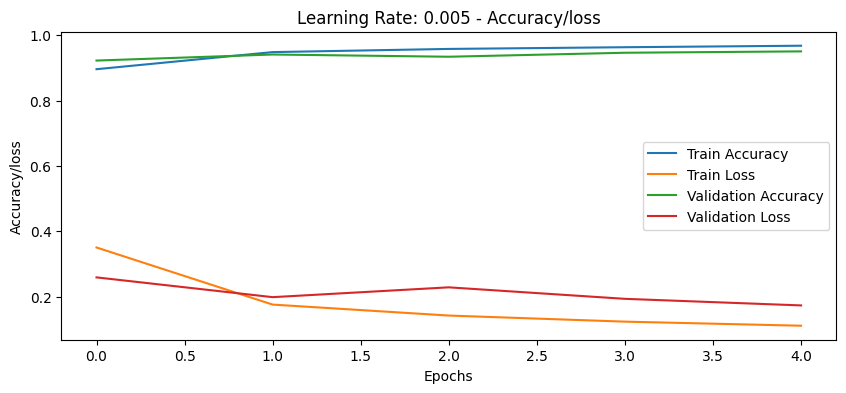

Training with Learning Rate: 0.01
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.4554 - val_accuracy: 0.9201 - val_loss: 0.2832
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.4554 - val_accuracy: 0.9201 - val_loss: 0.2832
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9284 - loss: 0.2405 - val_accuracy: 0.9331 - val_loss: 0.2364
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9284 - loss: 0.2405 - val_accuracy: 0.9331 - val_loss: 0.2364
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.2073 - val_accuracy: 0.9400 - val_loss: 0.2058
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.2073 - val_accuracy: 0.9400 - val_loss: 0.2058
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9445 - loss: 0.1907 - val_accuracy: 0.9401 - val_loss: 0.2135
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9445 - loss:

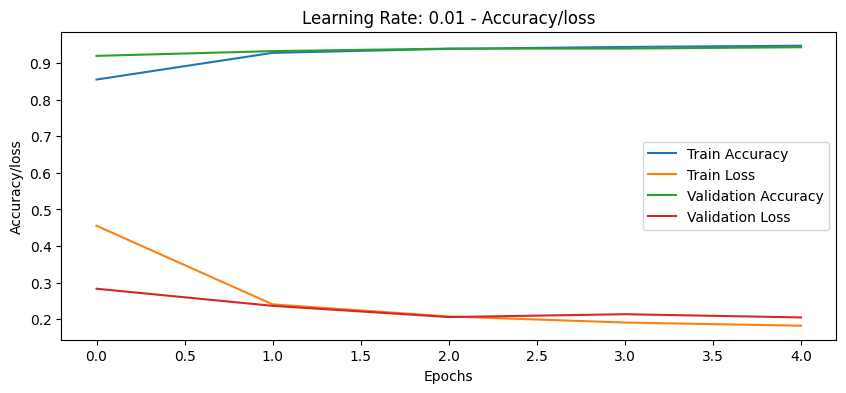

Training with Learning Rate: 0.05
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8076 - loss: 0.7093 - val_accuracy: 0.7346 - val_loss: 1.3073
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8076 - loss: 0.7093 - val_accuracy: 0.7346 - val_loss: 1.3073
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.4201 - val_accuracy: 0.8929 - val_loss: 0.4630
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.4201 - val_accuracy: 0.8929 - val_loss: 0.4630
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9036 - loss: 0.3899 - val_accuracy: 0.8925 - val_loss: 0.4665
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9036 - loss: 0.3899 - val_accuracy: 0.8925 - val_loss: 0.4665
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3877 - val_accuracy: 0.9047 - val_loss: 0.4440
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss:

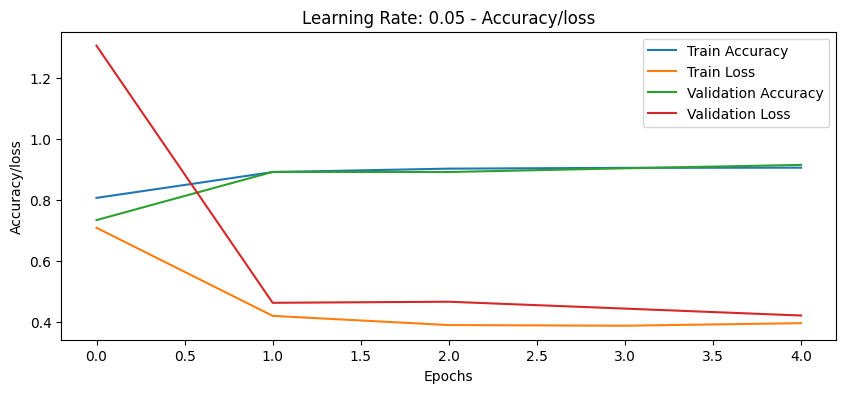

Done!


In [47]:
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
lr_results = {}

for lr in learning_rates:
    print(f"Training with Learning Rate: {lr}")
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                       validation_data=(X_test, y_test))
    
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Rate: {lr} - Accuracy/loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/loss')
    plt.legend()
    plt.show()
    
    tf.keras.backend.clear_session()

print("Done!")

## 6. Dynamic Learning Rates (Warmup + Cosine Decay)

Training with Constant LR (0.001)
Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.5222 - val_accuracy: 0.9226 - val_loss: 0.2740
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9335 - loss: 0.2355 - val_accuracy: 0.9416 - val_loss: 0.2014
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9469 - loss: 0.1874 - val_accuracy: 0.9501 - val_loss: 0.1725
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9539 - loss: 0.1609 - val_accuracy: 0.9542 - val_loss: 0.1566
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1427 - val_accuracy: 0.9571 - val_loss: 0.1454


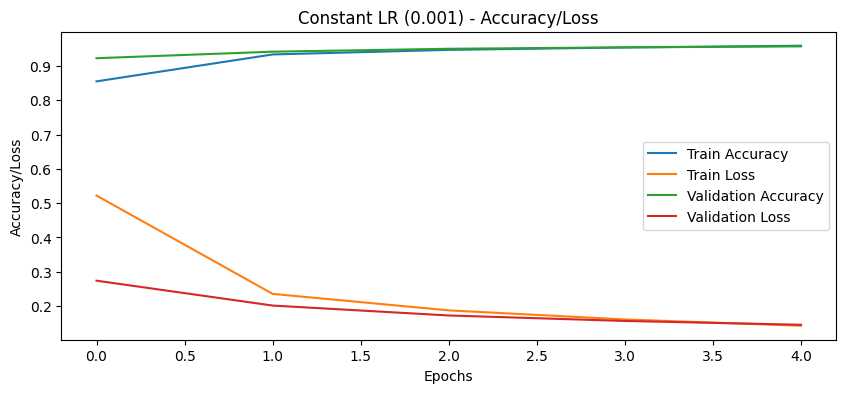

Training with Warmup Only
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.5377 - val_accuracy: 0.9205 - val_loss: 0.2724 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9329 - loss: 0.2337 - val_accuracy: 0.9374 - val_loss: 0.2091 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1887 - val_accuracy: 0.9444 - val_loss: 0.1798 - learning_rate: 0.0010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9532 - loss: 0.1622 - val_accuracy: 0.9517 - val_loss: 0.1598 - learning_rate: 0.0010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1437 - val_accuracy: 0.9567 - val_loss: 0.1459 - learning_rate: 0.0010


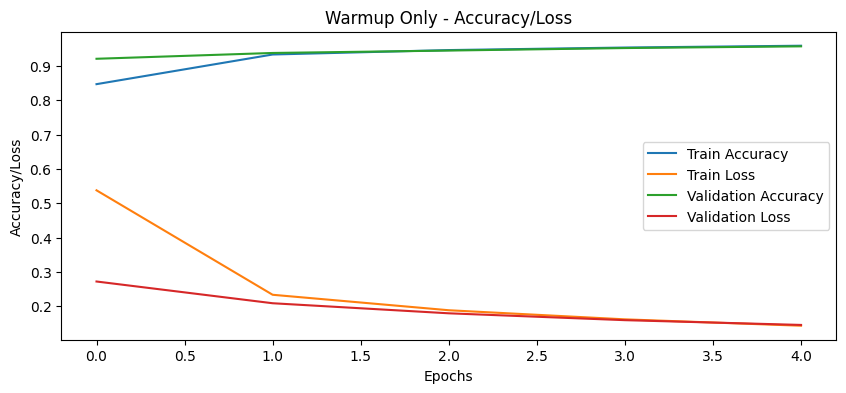

Training with Warmup + Cosine Decay
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.4993 - val_accuracy: 0.9230 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9300 - loss: 0.2392 - val_accuracy: 0.9364 - val_loss: 0.2071 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9430 - loss: 0.1948 - val_accuracy: 0.9449 - val_loss: 0.1809 - learning_rate: 9.7286e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9509 - loss: 0.1674 - val_accuracy: 0.9493 - val_loss: 0.1648 - learning_rate: 8.9472e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9567 - loss: 0.1483 - val_accuracy: 0.9523 - val_loss: 0.1549 - learning_rate: 7.7500e-04


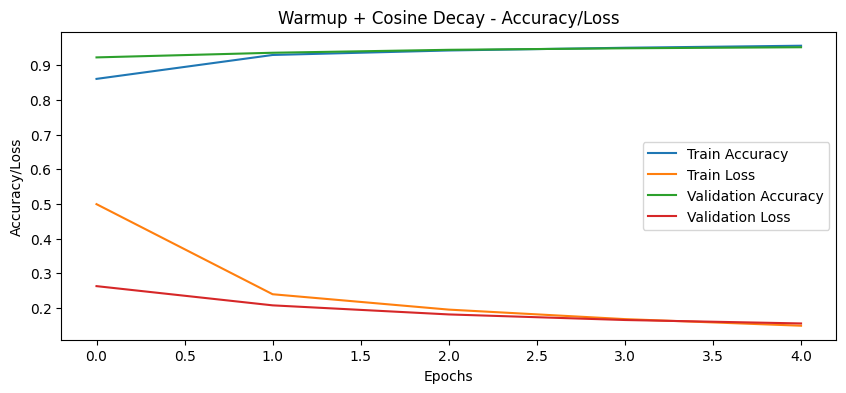

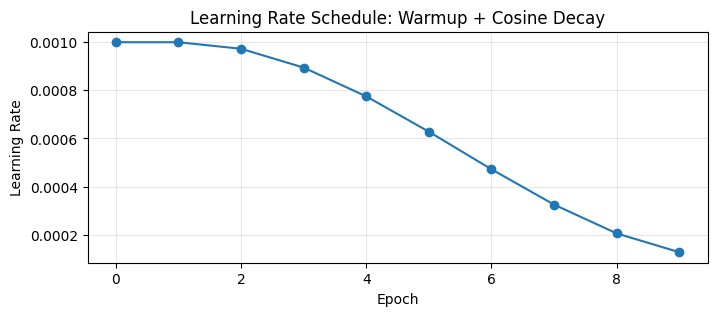

Training with Exponential Decay
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8256 - loss: 0.6144 - val_accuracy: 0.9149 - val_loss: 0.2985 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9290 - loss: 0.2496 - val_accuracy: 0.9329 - val_loss: 0.2310 - learning_rate: 9.0000e-04
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1961 - val_accuracy: 0.9420 - val_loss: 0.2020 - learning_rate: 8.1000e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9516 - loss: 0.1689 - val_accuracy: 0.9482 - val_loss: 0.1795 - learning_rate: 7.2900e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9570 - loss: 0.1510 - val_accuracy: 0.9513 - val_loss: 0.1640 - learning_rate: 6.5610e-04


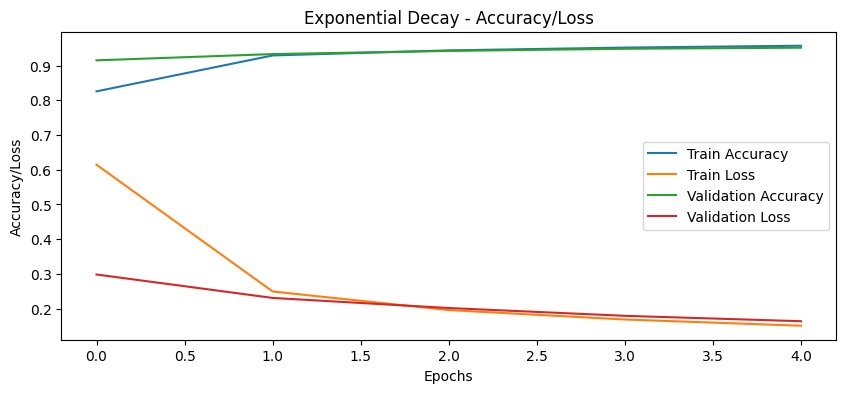

Done!


In [50]:
import numpy as np
from tensorflow.keras.callbacks import LearningRateScheduler

# Constant learning rate
print("Training with Constant LR (0.001)")
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                   validation_data=(X_test, y_test))

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Constant LR (0.001) - Accuracy/Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
tf.keras.backend.clear_session()

# Warmup only
print("Training with Warmup Only")
def warmup_lr(epoch):
    if epoch < 1:
        return 0.001 * (epoch + 1) / 1
    else:
        return 0.001

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                   validation_data=(X_test, y_test), 
                   callbacks=[LearningRateScheduler(warmup_lr)])

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Warmup Only - Accuracy/Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
tf.keras.backend.clear_session()

# Warmup + Cosine Decay
print("Training with Warmup + Cosine Decay")
def warmup_cosine_lr(epoch):
    warmup_epochs = 1
    total_epochs = 10
    max_lr = 0.001
    min_lr = 0.0001
    
    if epoch < warmup_epochs:
        return max_lr * (epoch + 1) / warmup_epochs
    else:
        progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
        return min_lr + (max_lr - min_lr) * 0.5 * (1 + np.cos(np.pi * progress))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                   validation_data=(X_test, y_test), 
                   callbacks=[LearningRateScheduler(warmup_cosine_lr)])

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Warmup + Cosine Decay - Accuracy/Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

# Show the LR schedule
lr_values = [warmup_cosine_lr(e) for e in range(10)]
plt.figure(figsize=(8,3))
plt.plot(lr_values, marker='o')
plt.title('Learning Rate Schedule: Warmup + Cosine Decay')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True, alpha=0.3)
plt.show()
tf.keras.backend.clear_session()

# Exponential Decay
print("Training with Exponential Decay")
def exp_decay_lr(epoch):
    return 0.001 * 0.9 ** epoch

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                   validation_data=(X_test, y_test), 
                   callbacks=[LearningRateScheduler(exp_decay_lr)])

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Exponential Decay - Accuracy/Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
tf.keras.backend.clear_session()

print("Done!")